In [1]:
import numpy as np
from itertools import combinations
import pandas as pd
import math
import pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib.cm as cm
import matplotlib.colors as pltcolors

In [2]:
file_name = "new_dataset_2"
def getData(file_name):
    file_handle = open(file_name + ".txt", "r")
    lines = file_handle.readlines()
    gene_ids = []
    ground_truth_clusters = []
    input_matrix = []
    for line in lines:
        row = line.strip().split("\t")
        gene_ids.append(row.pop(0))
        ground_truth_clusters.append(row.pop(0))
        att_list=[float(i) for i in row]
        input_matrix.append(att_list)
    return gene_ids, ground_truth_clusters, input_matrix

In [3]:
gene_ids, ground_truth_clusters, input_matrix = getData(file_name)

In [4]:
distance_dict={}
for i in range(0, len(input_matrix)):
    distance_dict[str(i)] = {}
    for j in range(0, len(input_matrix)): 
        
        if(i==j):
            distance_dict[str(i)][str(j)] = {}
            distance_dict[str(i)][str(j)] = float('inf')
#         elif(i<j):
#             break
        else:
            distance_dict[str(i)][str(j)] = {}
            dist = 0
            for a in range(len(input_matrix[j])):
                dist = dist+ (input_matrix[i][a]-input_matrix[j][a])**2
            distance_dict[str(i)][str(j)] = math.sqrt(dist)

In [5]:
num_clusters = 3

In [6]:
final_cluster_list = []
dist_dict = {}
dist_dict = distance_dict
dist_list  = list(dist_dict.keys())
while len(list(dist_dict))>num_clusters:    
    distance=float('inf')
    point1=0
    point2=0
    key_list = dist_dict.keys()
    for i in key_list:
        subdict = dist_dict.get(i)
        
        for j in subdict.keys():
            value = subdict[j]
#             if(value==0):
#                 break
#             else:
                
            if value<distance:
                distance = value
                point2 = j
                point1 = i
    #print(distance)

    dist_dict[point1+","+point2] = {}

    for key in key_list:

        val1 = dist_dict[point1][key]
        val2 = dist_dict[point2][key]

        dist_dict[point1+","+point2][key] = min(val1,val2)
        dist_dict[key][point1+","+point2] = min(val1,val2)

    dist_dict[point1+","+point2][point1+","+point2] = float('inf')

    del dist_dict[point1]
    del dist_dict[point2]

    for i in list(dist_dict):
        del dist_dict[i][point1]
        del dist_dict[i][point2]    

In [7]:
final_cluster_list = [i for i in dist_dict.keys()]

In [8]:
cluster_list = [0]*len(input_matrix)
C=0
for i in final_cluster_list:
    lst = i.split(",")
    for j in lst:
        cluster_list[int(j)] = C
    C=C+1

In [9]:
incident_cluster_list = []
for i in range(len(cluster_list)):
    row_values = []
    val=0
    for j in range(len(cluster_list)):
        if(cluster_list[i]==cluster_list[j]):
            val=1
        row_values.append(val)
        val=0
    incident_cluster_list.append(row_values)

In [10]:
incident_ground_truth=[]
ground_truth_clusters = [ int(x) for x in ground_truth_clusters]
for i in range(len(ground_truth_clusters)):
    row_values = []
    val=0
    for j in range(len(ground_truth_clusters)):
        if(ground_truth_clusters[i]==ground_truth_clusters[j]):
            val=1
        row_values.append(val)
        val=0
    incident_ground_truth.append(row_values)

In [11]:
m00=0
m01=0
m10=0
m11=0
for i in range(len(incident_cluster_list)):
    for j in range(len(incident_cluster_list)):
        if(incident_cluster_list[i][j]==incident_ground_truth[i][j]):
            if(incident_cluster_list[i][j]==1):
                m11=m11+1
            else:
                m00=m00+1
        else:
            if(incident_cluster_list[i][j]==1):
                m10=m10+1
            else:
                m01=m01+1     

In [12]:
randID = (m11+m00)/(m00+m11+m01+m10)
jaccardCoeff = m11/(m11+m10+m01)

In [13]:
print("Jaccard Coefficient:\t", jaccardCoeff)
print("Rand Index:\t\t", randID)

Jaccard Coefficient:	 0.7777777777777778
Rand Index:		 0.8888888888888888


In [14]:
pca_data1 = PCA(n_components=2).fit_transform(input_matrix)

In [15]:
#Function to plot the data
def plotData(file_name, data,clusters):
    allcolors=[]
    for i in pltcolors.cnames.items():
        allcolors.append(i[0])
    plt.figure(figsize=(12,9))
    legend = list()
    classes = list(set(clusters))
    allcolors1 = ['red','deepskyblue','green','purple', 'brown', 'plum', 'darkcyan','blue','magenta','lightslategray','black','yellow','mediumpurple','cyan',]
    if(len(classes)>len(allcolors)):
        colors = [random.choice(allcolors) for i in range(len(classes))]
    else:
        colors = allcolors1
    for i in range(len(classes)):
        cluster_data = data[np.where(np.array(clusters) == classes[i])]
        legend.append(plt.scatter(cluster_data[:,0],cluster_data[:,1], c=colors[i], s=50, alpha=0.9))
        #plt.scatter(centroids[i][0],centroids[i][1], s=150, marker="x", c=colors[i], alpha = 0.9)
    plt.legend(legend,classes)
    plt.xlabel("Principle Component 1")
    plt.ylabel("Principle Component 2")
    plt.title("PCA visualization for Hierarchical Agglomerative Clustering and "+file_name+".txt file")
    plt.savefig("Hierarchical_"+file_name+".png")
    plt.show()

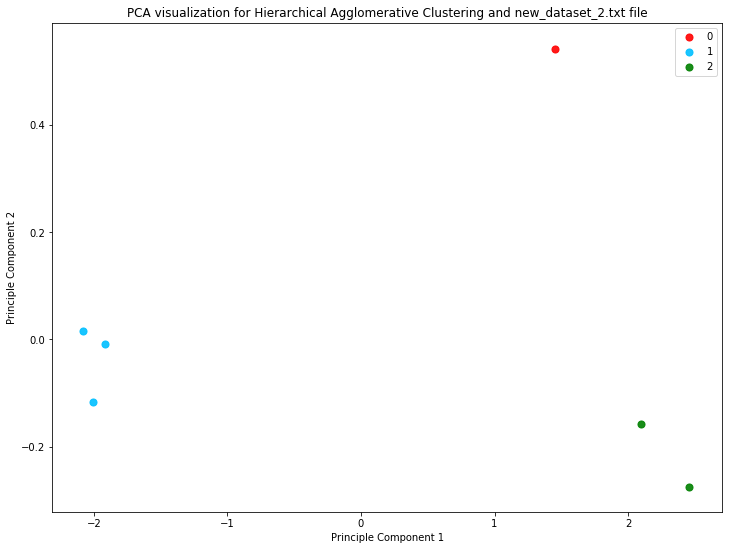

In [16]:
plotData(file_name,pca_data1, cluster_list)